In [511]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('default of credit card clients.csv')


In [512]:
# Explore the dataset to understand its characteristics
print(data.head())


   LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0      20000    2          2         1   24      2      2     -1     -1   
1     120000    2          2         2   26     -1      2      0      0   
2      90000    2          2         2   34      0      0      0      0   
3      50000    2          2         1   37      0      0      0      0   
4      50000    1          2         1   57     -1      0     -1      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -2  ...          0          0          0         0       689         0   
1      0  ...       3272       3455       3261         0      1000      1000   
2      0  ...      14331      14948      15549      1518      1500      1000   
3      0  ...      28314      28959      29547      2000      2019      1200   
4      0  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0     

In [513]:
print(data.shape)
print(data['default payment next month'].value_counts())

(30000, 24)
0    23364
1     6636
Name: default payment next month, dtype: int64


In [514]:
print(data.isnull().sum())

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


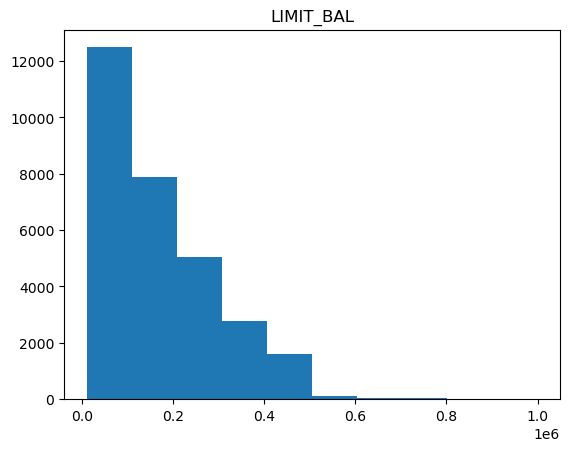

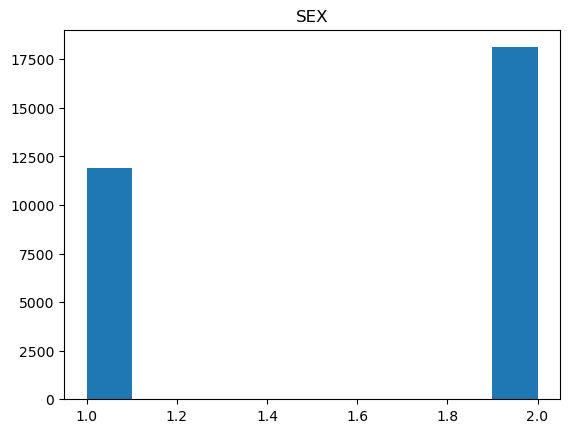

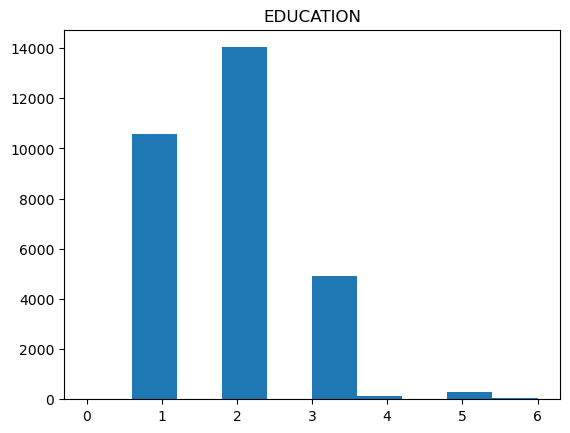

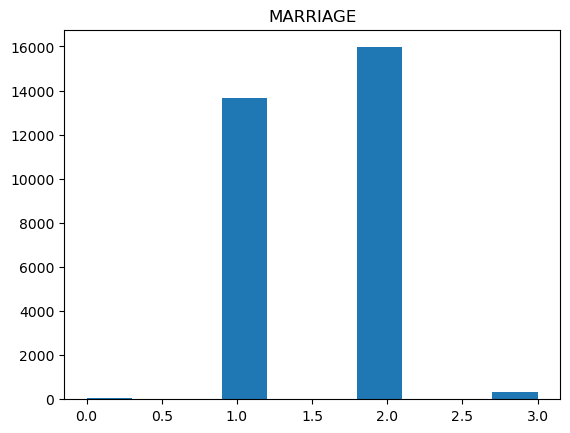

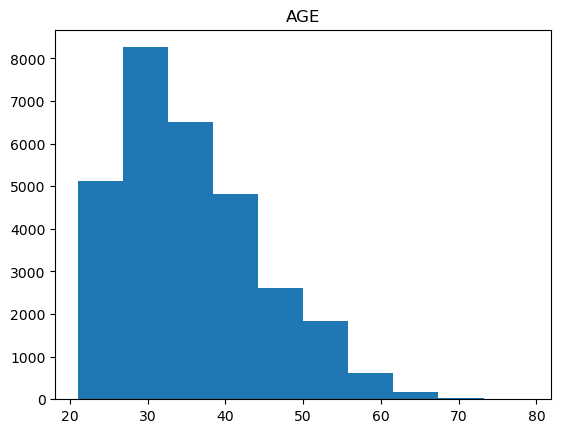

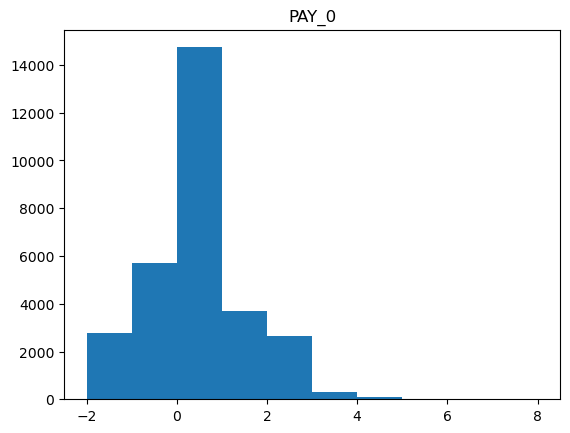

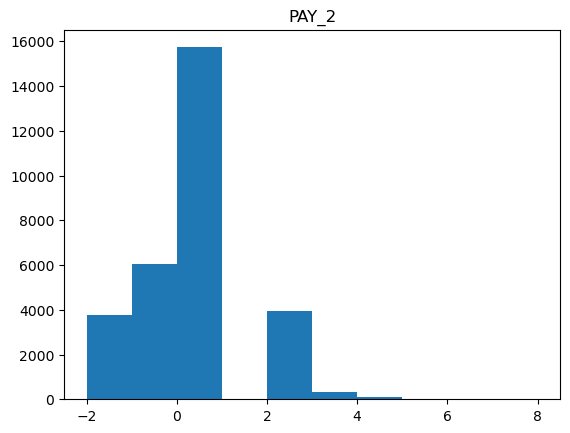

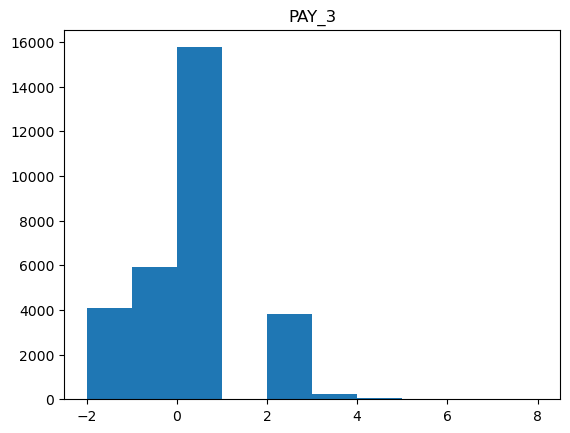

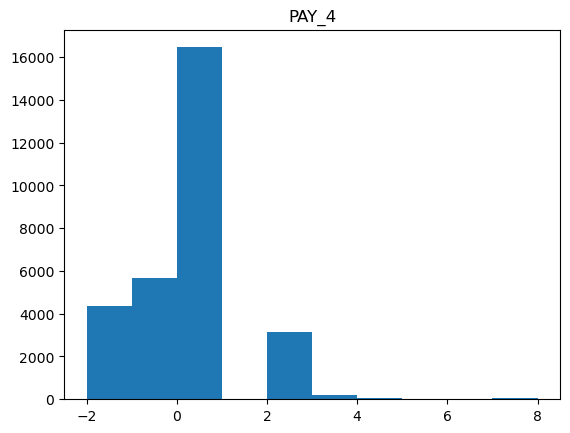

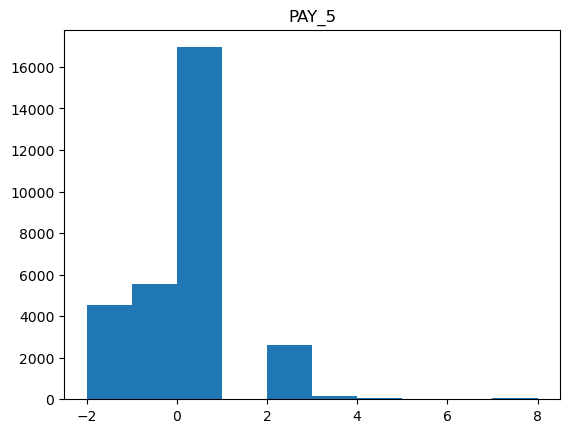

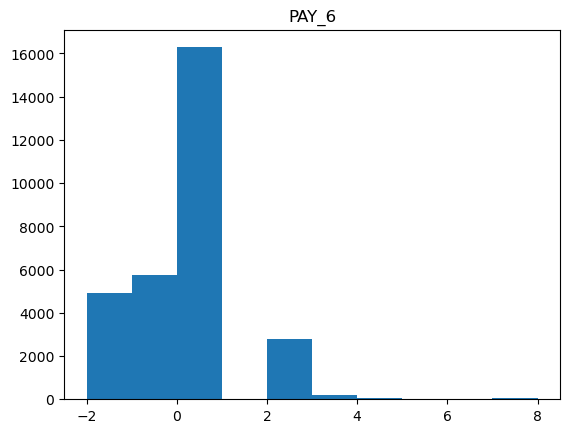

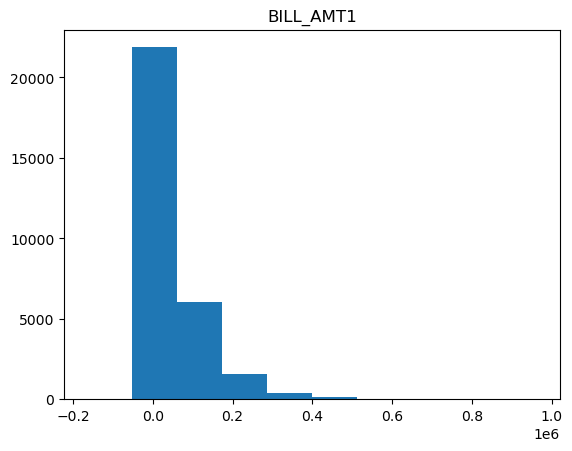

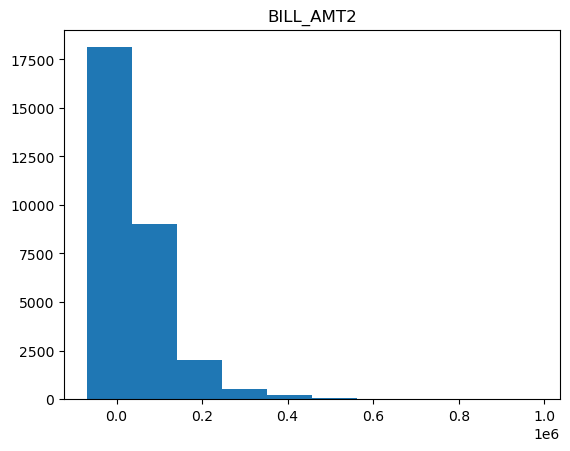

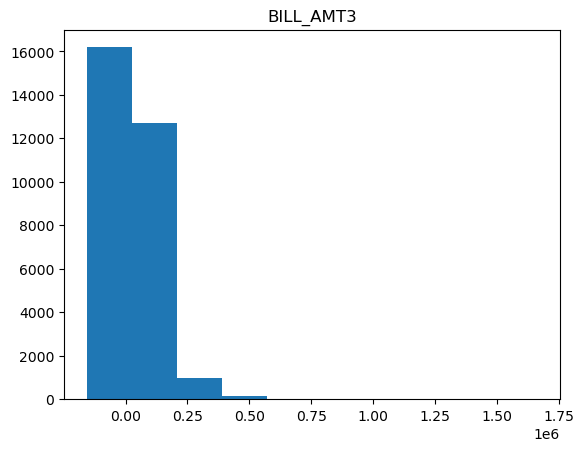

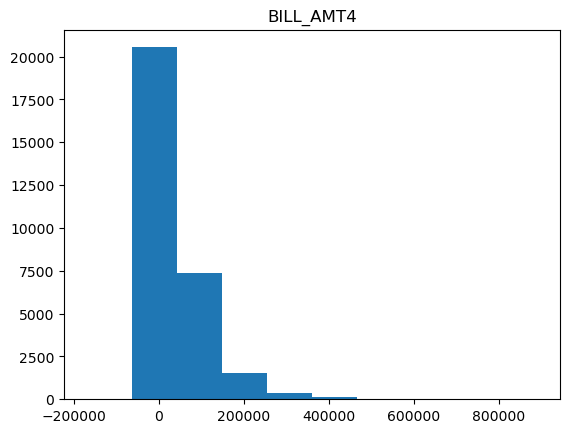

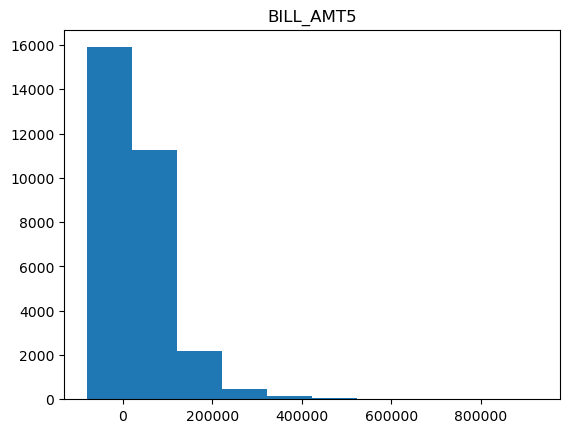

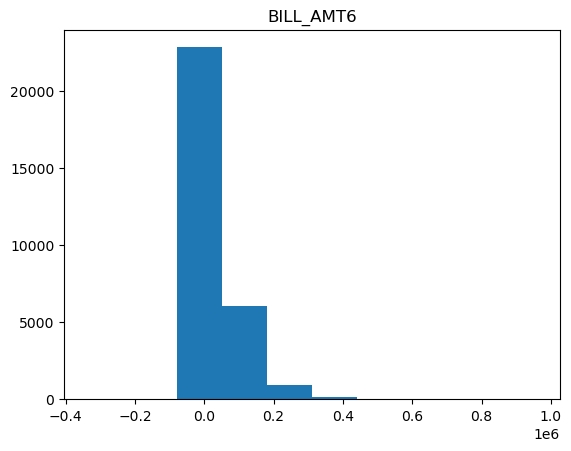

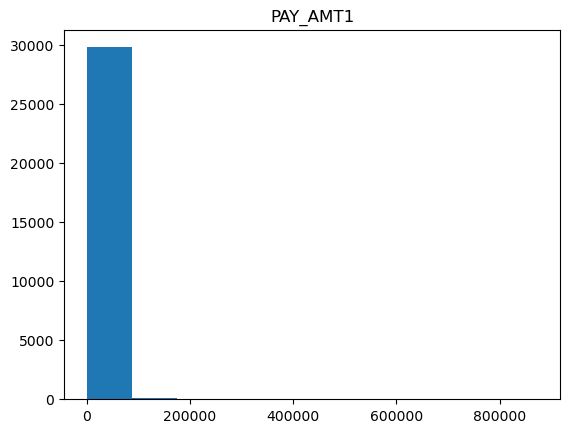

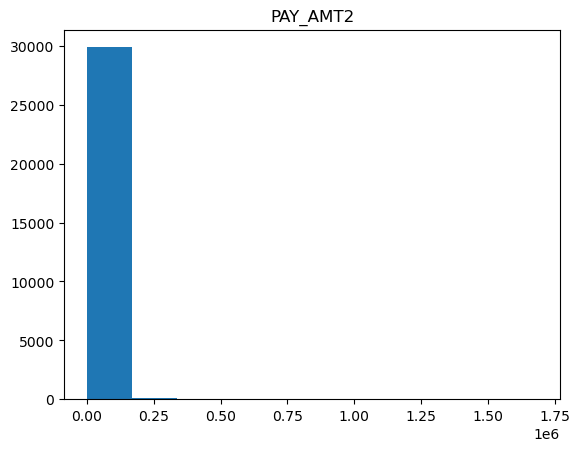

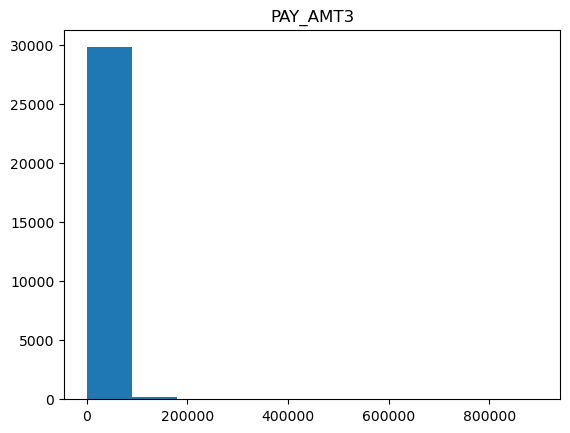

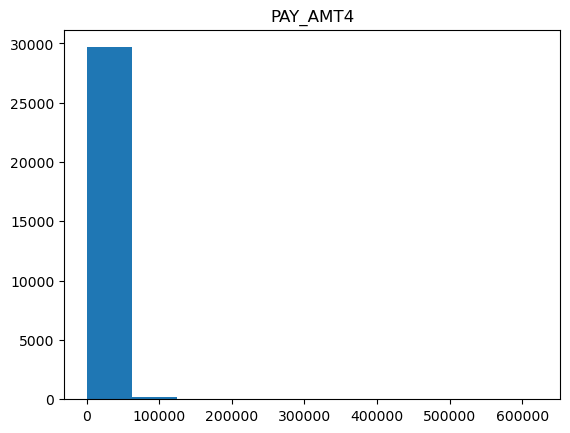

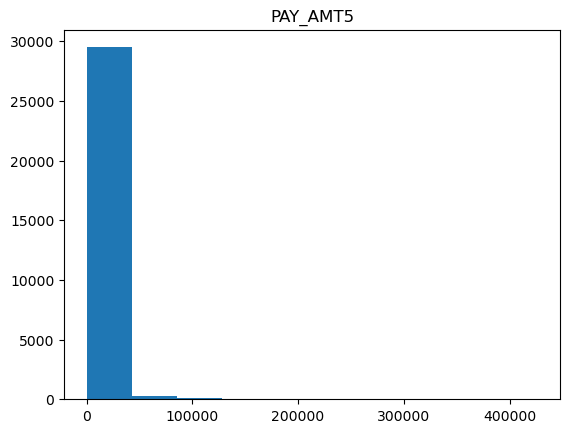

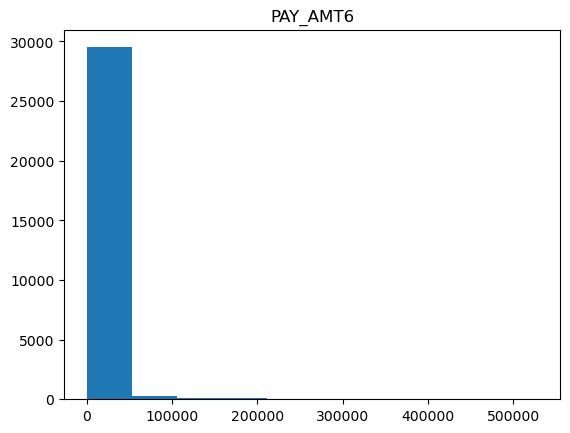

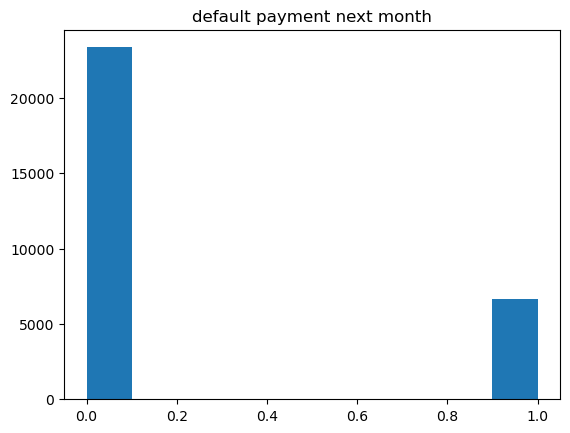

In [515]:
# Analyze variable distributions using for loop and matplotlib
for i in data.columns:
    plt.hist(data[i])
    plt.title(i)
    plt.show()


In [516]:
#identify missing values
print(data.isnull().sum())

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


In [517]:
#print all the columns
print(data.columns)

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


In [518]:
data['limit_bal_bin'] = pd.cut(data['LIMIT_BAL'], bins=[-np.inf, 100000, 200000, 300000, 400000, np.inf], labels=['0-100k', '100k-200k', '200k-300k', '300k-400k', '>400k'])
print(data['limit_bal_bin'].value_counts())

0-100k       12498
100k-200k     7880
200k-300k     5059
300k-400k     2759
>400k         1804
Name: limit_bal_bin, dtype: int64


In [519]:
#value counts for education
print(data['EDUCATION'].value_counts())
#Bin Education as (1 = graduate school; 2 = university; 3 = high school; rest = others)
data['EDUCATION'] = data['EDUCATION'].replace([0, 4, 5, 6], 4)
#Bin using pandas cut function
data['EDUCATION'] = pd.cut(data['EDUCATION'], bins=[-np.inf, 1, 2, 3, np.inf], labels=['graduate school', 'university', 'high school', 'others'])
print(data['EDUCATION'].value_counts())

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64
university         14030
graduate school    10585
high school         4917
others               468
Name: EDUCATION, dtype: int64


In [520]:
#Marriage (1 = married; 2 = single; rest = others)
print(data['MARRIAGE'].value_counts())
#teabag the rest into others
data['MARRIAGE'] = data['MARRIAGE'].replace(0, 3)
print(data['MARRIAGE'].value_counts())
#Bin using pandas cut function
data['MARRIAGE'] = pd.cut(data['MARRIAGE'], bins=[-np.inf, 1, 2, np.inf], labels=['married', 'single', 'others'])
print(data['MARRIAGE'].value_counts())

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64
2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64
single     15964
married    13659
others       377
Name: MARRIAGE, dtype: int64


In [521]:
# Bin all numeric variables - Age
data['age_bin'] = pd.cut(data['AGE'], bins=[20, 30, 40, 50, 60, np.inf], labels=[ '20-30', '30-40', '40-50', '50-60', '>60'])
print(data['age_bin'].value_counts())
#Bin all numeric variables - LIMIT_BAL

20-30    11013
30-40    10713
40-50     6005
50-60     1997
>60        272
Name: age_bin, dtype: int64


In [522]:
# Bin all numeric variables - PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6 to PAY_0_Bin etc using for loop and pandas cut function
for i in ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
    data[i+'_Bin'] = pd.cut(data[i], bins=[-np.inf, 0, 1, 2, np.inf], labels=['on time', '30DPD','60DPD', '>=90DPD'])
    print(data[i+'_Bin'].value_counts())
    print(data[i+'_Bin'].value_counts(normalize=True))

on time    23182
30DPD       3688
60DPD       2667
>=90DPD      463
Name: PAY_0_Bin, dtype: int64
on time    0.772733
30DPD      0.122933
60DPD      0.088900
>=90DPD    0.015433
Name: PAY_0_Bin, dtype: float64
on time    25562
60DPD       3927
>=90DPD      483
30DPD         28
Name: PAY_2_Bin, dtype: int64
on time    0.852067
60DPD      0.130900
>=90DPD    0.016100
30DPD      0.000933
Name: PAY_2_Bin, dtype: float64
on time    25787
60DPD       3819
>=90DPD      390
30DPD          4
Name: PAY_3_Bin, dtype: int64
on time    0.859567
60DPD      0.127300
>=90DPD    0.013000
30DPD      0.000133
Name: PAY_3_Bin, dtype: float64
on time    26490
60DPD       3159
>=90DPD      349
30DPD          2
Name: PAY_4_Bin, dtype: int64
on time    0.883000
60DPD      0.105300
>=90DPD    0.011633
30DPD      0.000067
Name: PAY_4_Bin, dtype: float64
on time    27032
60DPD       2626
>=90DPD      342
30DPD          0
Name: PAY_5_Bin, dtype: int64
on time    0.901067
60DPD      0.087533
>=90DPD    0.011400
30

In [523]:
#calculate percentile (0.25, 0.5, 0.75,0.9,0.95,0.99) for Bill_AMT1 - Bill_AMT6 using for loop
for i in ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5','BILL_AMT6']:
    print(data[i].describe(percentiles=[0.25, 0.5, 0.75,0.9,0.95,0.99]))
    

count     30000.000000
mean      51223.330900
std       73635.860576
min     -165580.000000
25%        3558.750000
50%       22381.500000
75%       67091.000000
90%      142133.700000
95%      201203.050000
99%      350110.680000
max      964511.000000
Name: BILL_AMT1, dtype: float64
count     30000.000000
mean      49179.075167
std       71173.768783
min      -69777.000000
25%        2984.750000
50%       21200.000000
75%       64006.250000
90%      136905.500000
95%      194792.200000
99%      337495.280000
max      983931.000000
Name: BILL_AMT2, dtype: float64
count    3.000000e+04
mean     4.701315e+04
std      6.934939e+04
min     -1.572640e+05
25%      2.666250e+03
50%      2.008850e+04
75%      6.016475e+04
90%      1.320513e+05
95%      1.878210e+05
99%      3.250304e+05
max      1.664089e+06
Name: BILL_AMT3, dtype: float64
count     30000.000000
mean      43262.948967
std       64332.856134
min     -170000.000000
25%        2326.750000
50%       19052.000000
75%       54506.00

In [524]:
#Bin BILL_AMT1 - BILL_AMT6 using for loop (bins=[-np.inf, 0, 100000, 200000, np.inf], labels=['<0', '0-100k', '100k-200k', '>200k])
for i in range(1,7):
    data['bill_amt_bin'+str(i)] = pd.cut(data['BILL_AMT'+str(i)], bins=[-np.inf, 50000, 100000,200000, np.inf], labels=['0-50k', '50k-100k', '100k-200k','>200k'])
    print(data['bill_amt_bin'+str(i)].value_counts())
    print(data['bill_amt_bin'+str(i)].value_counts(normalize=True))


0-50k        20494
50k-100k      4600
100k-200k     3383
>200k         1523
Name: bill_amt_bin1, dtype: int64
0-50k        0.683133
50k-100k     0.153333
100k-200k    0.112767
>200k        0.050767
Name: bill_amt_bin1, dtype: float64
0-50k        20797
50k-100k      4539
100k-200k     3272
>200k         1392
Name: bill_amt_bin2, dtype: int64
0-50k        0.693233
50k-100k     0.151300
100k-200k    0.109067
>200k        0.046400
Name: bill_amt_bin2, dtype: float64
0-50k        21239
50k-100k      4382
100k-200k     3123
>200k         1256
Name: bill_amt_bin3, dtype: int64
0-50k        0.707967
50k-100k     0.146067
100k-200k    0.104100
>200k        0.041867
Name: bill_amt_bin3, dtype: float64
0-50k        21961
50k-100k      4073
100k-200k     2941
>200k         1025
Name: bill_amt_bin4, dtype: int64
0-50k        0.732033
50k-100k     0.135767
100k-200k    0.098033
>200k        0.034167
Name: bill_amt_bin4, dtype: float64
0-50k        22465
50k-100k      3872
100k-200k     2787
>200k  

In [525]:
#print all the columns
print(data.columns)

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'limit_bal_bin', 'age_bin', 'PAY_0_Bin',
       'PAY_2_Bin', 'PAY_3_Bin', 'PAY_4_Bin', 'PAY_5_Bin', 'PAY_6_Bin',
       'bill_amt_bin1', 'bill_amt_bin2', 'bill_amt_bin3', 'bill_amt_bin4',
       'bill_amt_bin5', 'bill_amt_bin6'],
      dtype='object')


In [526]:
#calculate percentile of pay_amt1 to pay_amt6 (0.25, 0.5, 0.75, 0.9, 0.95, 0.99)
print(data['PAY_AMT1'].quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99]))
print(data['PAY_AMT2'].quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99]))
print(data['PAY_AMT3'].quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99]))
print(data['PAY_AMT4'].quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99]))
print(data['PAY_AMT5'].quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99]))
print(data['PAY_AMT6'].quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99]))


0.25     1000.00
0.50     2100.00
0.75     5006.00
0.90    10300.00
0.95    18428.20
0.99    66522.18
Name: PAY_AMT1, dtype: float64
0.25      833.00
0.50     2009.00
0.75     5000.00
0.90    10401.10
0.95    19004.35
0.99    76651.02
Name: PAY_AMT2, dtype: float64
0.25      390.0
0.50     1800.0
0.75     4505.0
0.90    10000.0
0.95    17589.4
0.99    70000.0
Name: PAY_AMT3, dtype: float64
0.25      296.00
0.50     1500.00
0.75     4013.25
0.90     9570.60
0.95    16014.95
0.99    67054.44
Name: PAY_AMT4, dtype: float64
0.25      252.50
0.50     1500.00
0.75     4031.50
0.90     9500.00
0.95    16000.00
0.99    65607.56
Name: PAY_AMT5, dtype: float64
0.25      117.75
0.50     1500.00
0.75     4000.00
0.90     9600.00
0.95    17343.80
0.99    82619.05
Name: PAY_AMT6, dtype: float64


In [527]:
#Bin PAY_AMT1 - PAY_AMT6 using for loop (<2000,2000-5000,5000-10000,10000-20000,>20000)
for i in range(1,7):
    data['pay_amt_bin'+str(i)] = pd.cut(data['PAY_AMT'+str(i)], bins=[-np.inf, 2000, 5000, 10000, 20000, np.inf], labels=['<2000', '2000-5000', '5000-10000', '10000-20000', '>20000'])
    print(data['pay_amt_bin'+str(i)].value_counts())
    print(data['pay_amt_bin'+str(i)].value_counts(normalize=True))


<2000          14415
2000-5000       8021
5000-10000      4329
10000-20000     1916
>20000          1319
Name: pay_amt_bin1, dtype: int64
<2000          0.480500
2000-5000      0.267367
5000-10000     0.144300
10000-20000    0.063867
>20000         0.043967
Name: pay_amt_bin1, dtype: float64
<2000          14893
2000-5000       7863
5000-10000      3991
10000-20000     1903
>20000          1350
Name: pay_amt_bin2, dtype: int64
<2000          0.496433
2000-5000      0.262100
5000-10000     0.133033
10000-20000    0.063433
>20000         0.045000
Name: pay_amt_bin2, dtype: float64
<2000          16702
2000-5000       6873
5000-10000      3551
10000-20000     1621
>20000          1253
Name: pay_amt_bin3, dtype: int64
<2000          0.556733
2000-5000      0.229100
5000-10000     0.118367
10000-20000    0.054033
>20000         0.041767
Name: pay_amt_bin3, dtype: float64
<2000          17653
2000-5000       6547
5000-10000      3212
10000-20000     1399
>20000          1189
Name: pay_amt_bi

In [528]:
#Create a new dataframe with only the binned variables
data_binned = data[['limit_bal_bin', 'EDUCATION', 'MARRIAGE', 'age_bin', 'PAY_0_Bin', 'PAY_2_Bin', 'PAY_3_Bin', 'PAY_4_Bin', 'PAY_5_Bin', 'PAY_6_Bin', 'bill_amt_bin1', 'bill_amt_bin2', 'bill_amt_bin3', 'bill_amt_bin4', 'bill_amt_bin5', 'bill_amt_bin6', 'pay_amt_bin1', 'pay_amt_bin2', 'pay_amt_bin3', 'pay_amt_bin4', 'pay_amt_bin5', 'pay_amt_bin6','default payment next month']]
print(data_binned.head())

  limit_bal_bin   EDUCATION MARRIAGE age_bin PAY_0_Bin PAY_2_Bin PAY_3_Bin  \
0        0-100k  university  married   20-30     60DPD     60DPD   on time   
1     100k-200k  university   single   20-30   on time     60DPD   on time   
2        0-100k  university   single   30-40   on time   on time   on time   
3        0-100k  university  married   30-40   on time   on time   on time   
4        0-100k  university  married   50-60   on time   on time   on time   

  PAY_4_Bin PAY_5_Bin PAY_6_Bin  ... bill_amt_bin4 bill_amt_bin5  \
0   on time   on time   on time  ...         0-50k         0-50k   
1   on time   on time     60DPD  ...         0-50k         0-50k   
2   on time   on time   on time  ...         0-50k         0-50k   
3   on time   on time   on time  ...         0-50k         0-50k   
4   on time   on time   on time  ...         0-50k         0-50k   

  bill_amt_bin6 pay_amt_bin1 pay_amt_bin2 pay_amt_bin3 pay_amt_bin4  \
0         0-50k        <2000        <2000        <2

In [529]:
data_binned.head()

,limit_bal_bin,EDUCATION,MARRIAGE,age_bin,PAY_0_Bin,PAY_2_Bin,PAY_3_Bin,PAY_4_Bin,PAY_5_Bin,PAY_6_Bin,...,bill_amt_bin4,bill_amt_bin5,bill_amt_bin6,pay_amt_bin1,pay_amt_bin2,pay_amt_bin3,pay_amt_bin4,pay_amt_bin5,pay_amt_bin6,default payment next month
0,0-100k,university,married,20-30,60DPD,60DPD,on time,on time,on time,on time,...,0-50k,0-50k,0-50k,<2000,<2000,<2000,<2000,<2000,<2000,1
1,100k-200k,university,single,20-30,on time,60DPD,on time,on time,on time,60DPD,...,0-50k,0-50k,0-50k,<2000,<2000,<2000,<2000,<2000,<2000,1
2,0-100k,university,single,30-40,on time,on time,on time,on time,on time,on time,...,0-50k,0-50k,0-50k,<2000,<2000,<2000,<2000,<2000,2000-5000,0
3,0-100k,university,married,30-40,on time,on time,on time,on time,on time,on time,...,0-50k,0-50k,0-50k,<2000,2000-5000,<2000,<2000,<2000,<2000,0
4,0-100k,university,married,50-60,on time,on time,on time,on time,on time,on time,...,0-50k,0-50k,0-50k,<2000,>20000,5000-10000,5000-10000,<2000,<2000,0


In [530]:
def calculate_woe_iv(df, binned_var, target_var, dependent_var):
    # Calculate the count of each target variable per bin
    bin_counts = df.groupby(binned_var)[target_var].count()

    # Calculate the count of target variable occurrences
    target_counts = df[target_var].sum()

    # Calculate the count of non-target variable occurrences
    non_target_counts = df[target_var].count() - target_counts

    # Calculate the WoE per bin
    woe = np.log((bin_counts / non_target_counts) / (target_counts / non_target_counts))

    # Calculate the proportion of target and non-target variables per bin
    bin_proportions = bin_counts / bin_counts.sum()
    target_proportions = target_counts / df[target_var].count()
    non_target_proportions = 1 - target_proportions

    # Calculate the IV per bin
    iv = (bin_proportions * (woe * (non_target_proportions - target_proportions))).sum()
    
    return woe, iv


In [531]:
# Calculate the WoE and IV per binned variable
for i in data_binned.columns[:-1]:
    woe, iv = calculate_woe_iv(data_binned, i, 'default payment next month', 'default payment next month')
    print('WoE and IV for column: {}'.format(i))
    print('WoE: {}'.format(woe))
    print('IV: {}'.format(iv))
    print('\n')

WoE and IV for column: limit_bal_bin
WoE: limit_bal_bin
0-100k       0.633059
100k-200k    0.171819
200k-300k   -0.271341
300k-400k   -0.877641
>400k       -1.302503
Name: default payment next month, dtype: float64
IV: 0.058028796675141374


WoE and IV for column: EDUCATION
WoE: EDUCATION
graduate school    0.466929
university         0.748689
high school       -0.299811
others            -2.651796
Name: default payment next month, dtype: float64
IV: 0.23663295265701823


WoE and IV for column: MARRIAGE
WoE: MARRIAGE
married    0.721889
single     0.877827
others    -2.868019
Name: default payment next month, dtype: float64
IV: 0.42363975063012793


WoE and IV for column: age_bin
WoE: age_bin
20-30    0.506567
30-40    0.478949
40-50   -0.099917
50-60   -1.200863
>60     -3.194463
Name: default payment next month, dtype: float64
IV: 0.12718446790267


WoE and IV for column: PAY_0_Bin
WoE: PAY_0_Bin
on time    1.250867
30DPD     -0.587425
60DPD     -0.911555
>=90DPD   -2.662538
Name: de

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


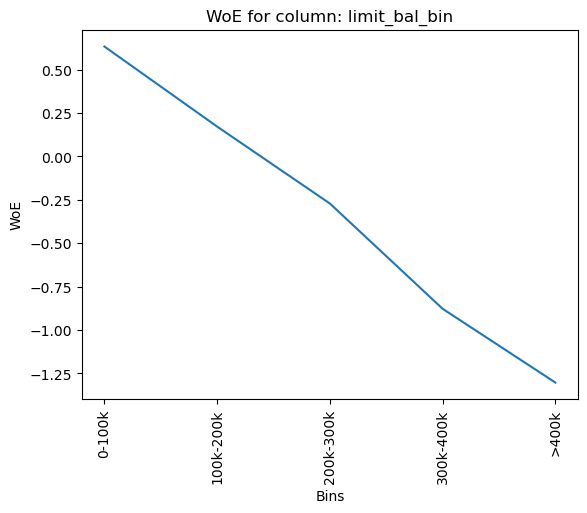

IV: 0.058028796675141374




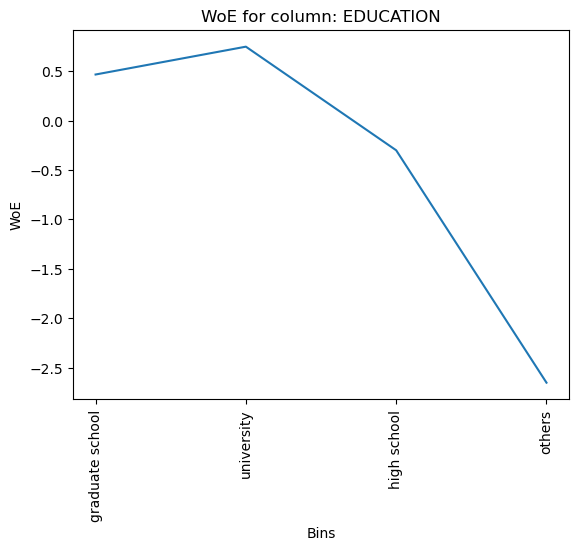

IV: 0.23663295265701823




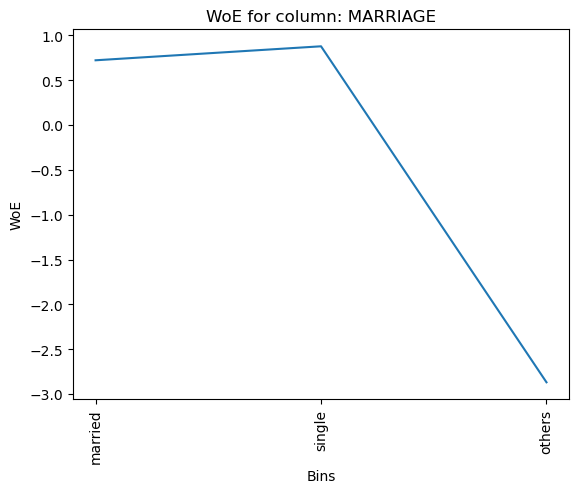

IV: 0.42363975063012793




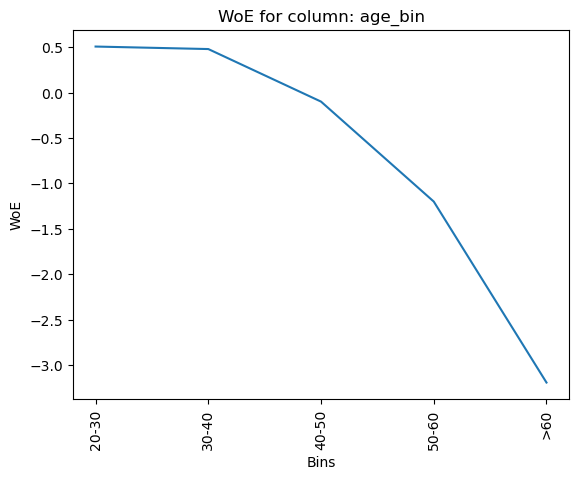

IV: 0.12718446790267




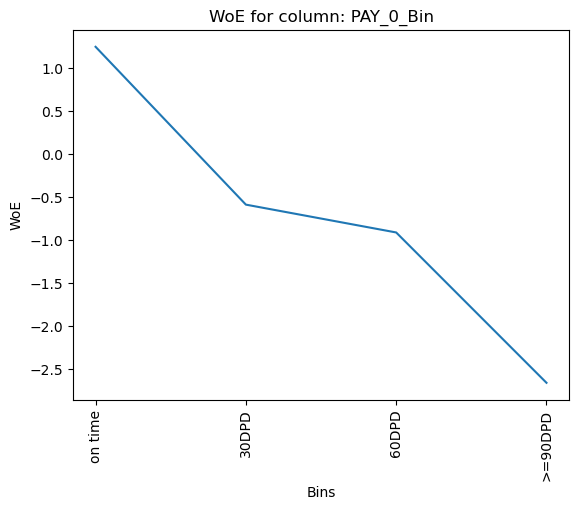

IV: 0.4306028224853023




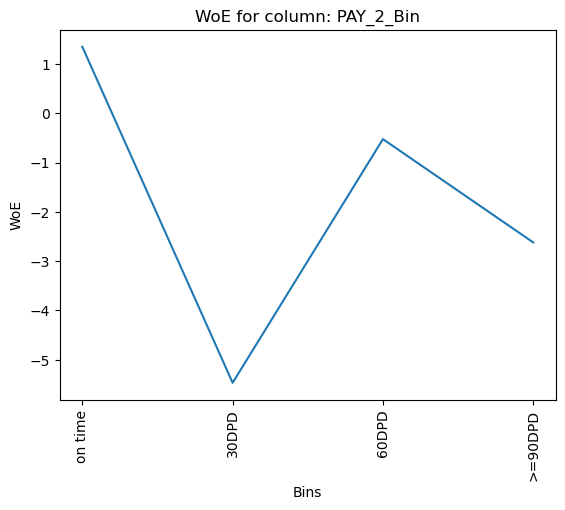

IV: 0.5760738033919307




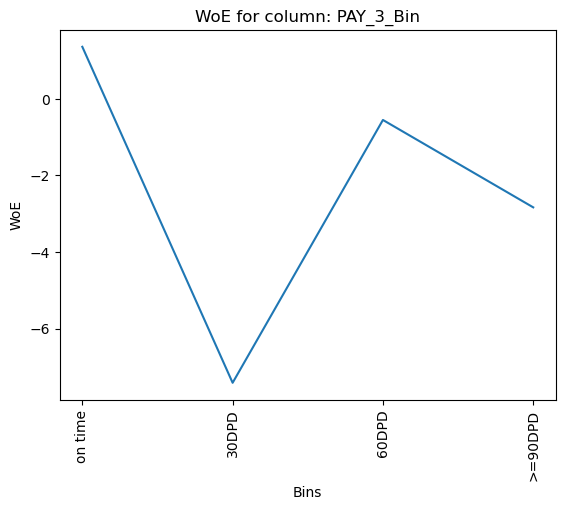

IV: 0.590261093802134




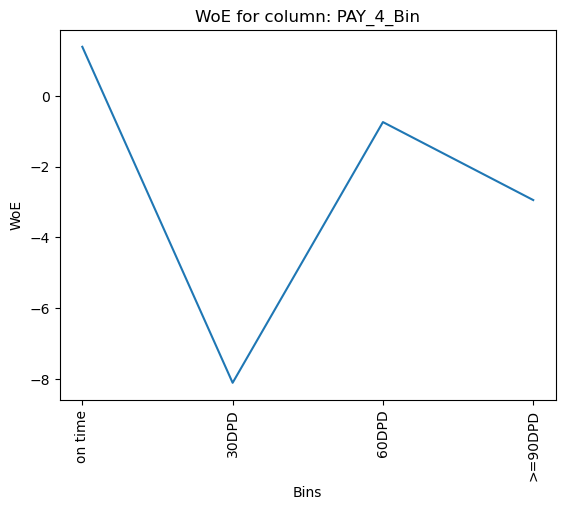

IV: 0.6185666119297183




C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


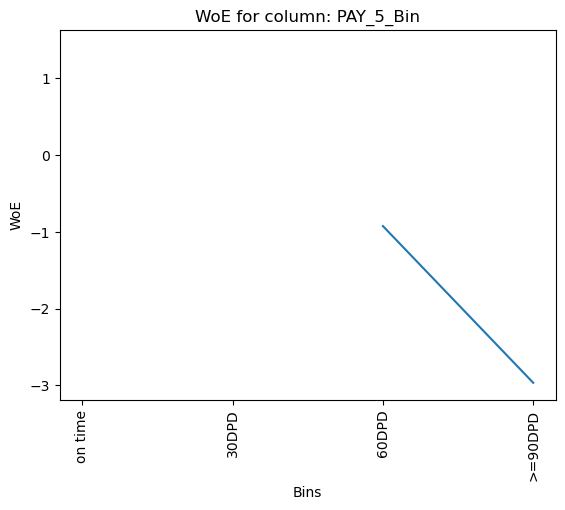

IV: 0.6415774509252451




C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


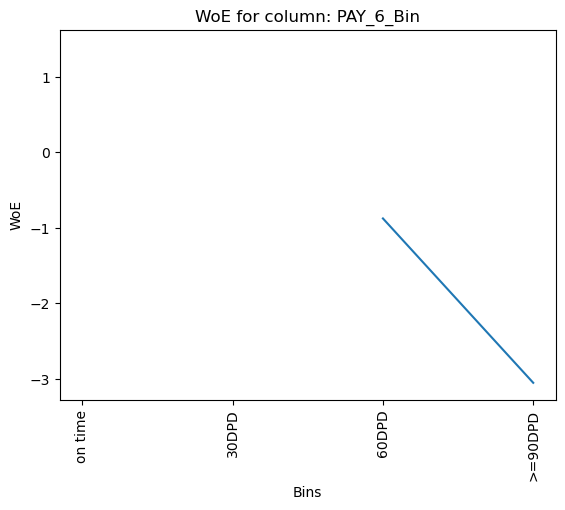

IV: 0.6379618242537906




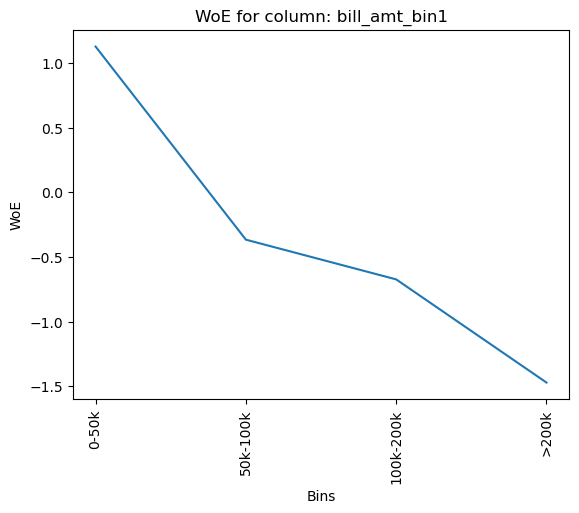

IV: 0.31416931101624496




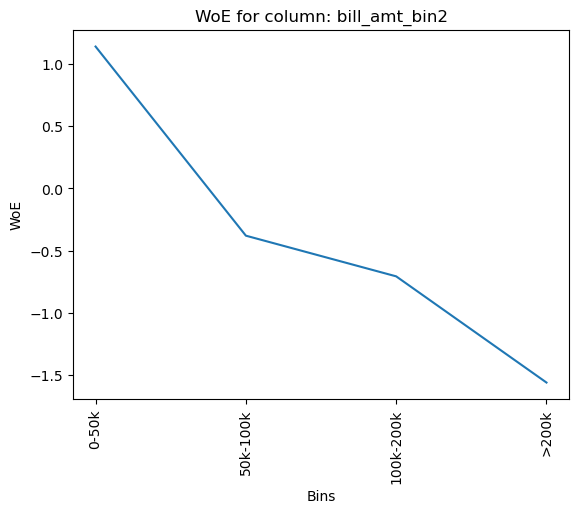

IV: 0.3261000523779491




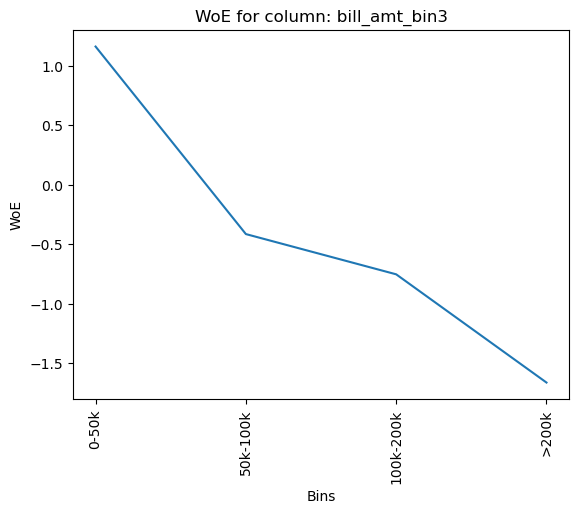

IV: 0.3428282847872123




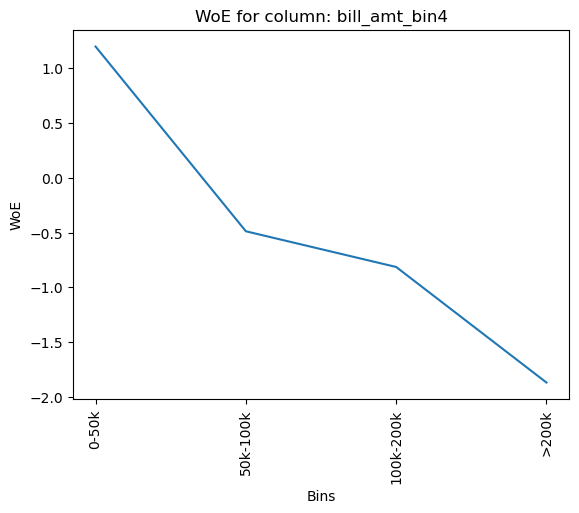

IV: 0.37147476409933045




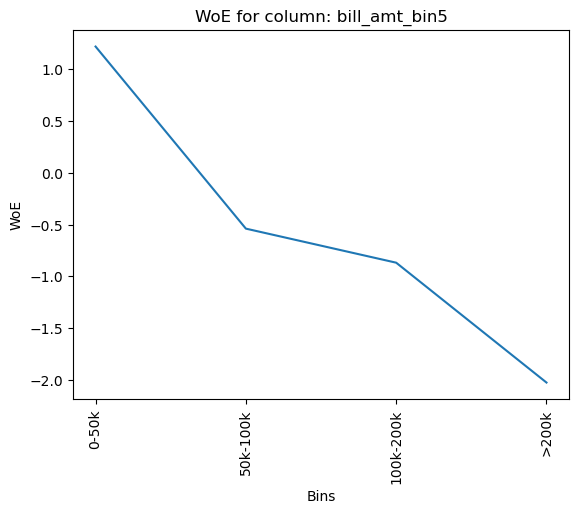

IV: 0.39249977118810775




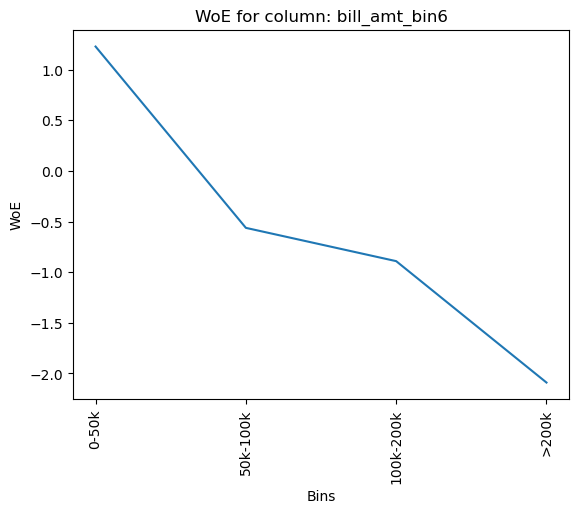

IV: 0.40129090263464917




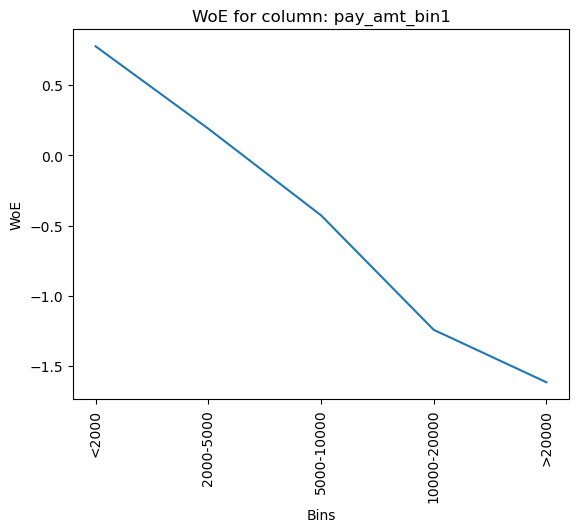

IV: 0.1178868115976564




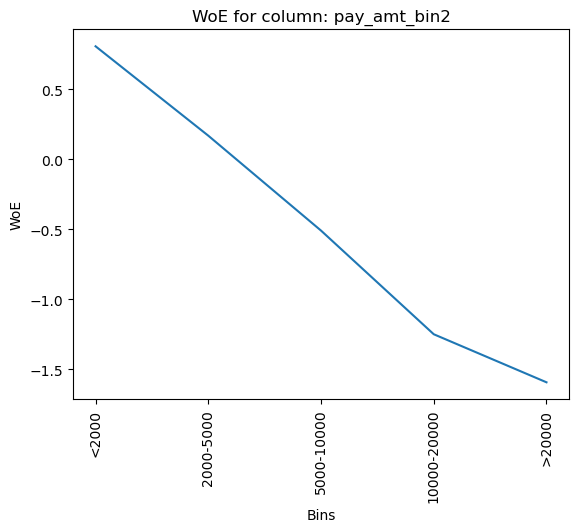

IV: 0.1267094722785494




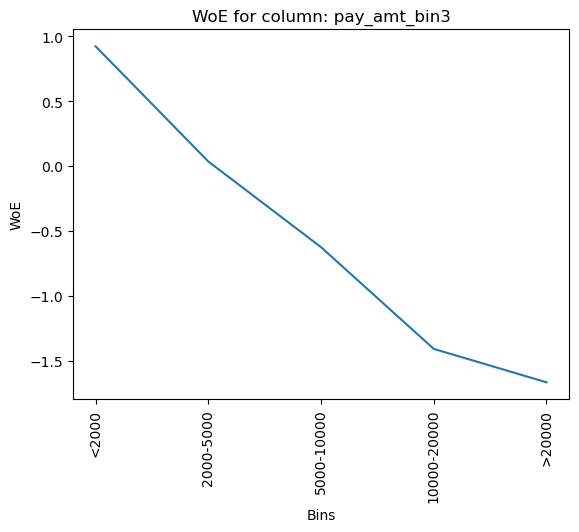

IV: 0.1684625131564243




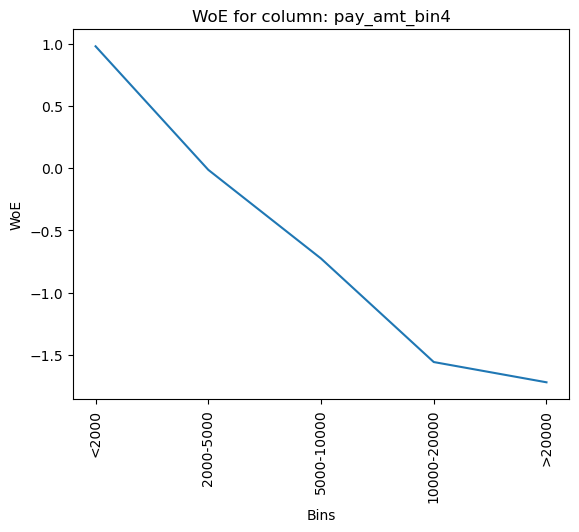

IV: 0.19758175025375666




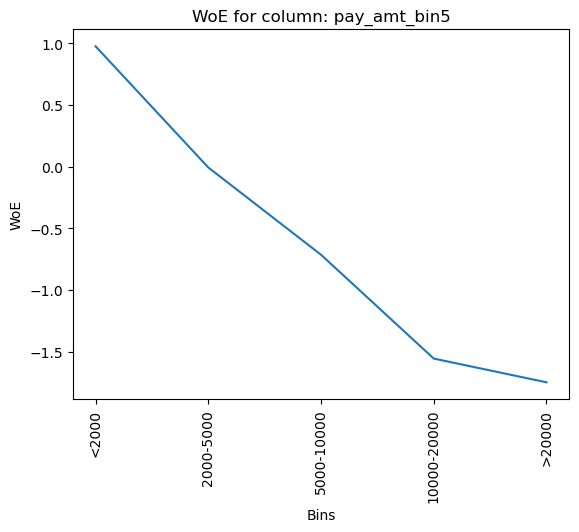

IV: 0.19712614479881635




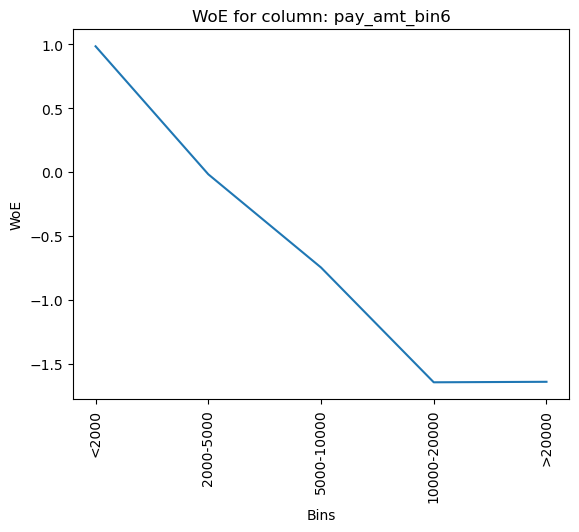

IV: 0.20068222105378913




In [532]:
#plot thw WOE and IV for each binned variable
for i in data_binned.columns[:-1]:
    woe, iv = calculate_woe_iv(data_binned, i, 'default payment next month', 'default payment next month')
    plt.figure()
    plt.plot(woe.index, woe.values)
    plt.title('WoE for column: {}'.format(i))
    plt.xlabel('Bins')
    plt.ylabel('WoE')
    plt.xticks(rotation=90)
    plt.show()

    print('IV: {}'.format(iv))
    print('\n')

In [533]:
print(data_binned.head())

  limit_bal_bin   EDUCATION MARRIAGE age_bin PAY_0_Bin PAY_2_Bin PAY_3_Bin  \
0        0-100k  university  married   20-30     60DPD     60DPD   on time   
1     100k-200k  university   single   20-30   on time     60DPD   on time   
2        0-100k  university   single   30-40   on time   on time   on time   
3        0-100k  university  married   30-40   on time   on time   on time   
4        0-100k  university  married   50-60   on time   on time   on time   

  PAY_4_Bin PAY_5_Bin PAY_6_Bin  ... bill_amt_bin4 bill_amt_bin5  \
0   on time   on time   on time  ...         0-50k         0-50k   
1   on time   on time     60DPD  ...         0-50k         0-50k   
2   on time   on time   on time  ...         0-50k         0-50k   
3   on time   on time   on time  ...         0-50k         0-50k   
4   on time   on time   on time  ...         0-50k         0-50k   

  bill_amt_bin6 pay_amt_bin1 pay_amt_bin2 pay_amt_bin3 pay_amt_bin4  \
0         0-50k        <2000        <2000        <2

In [534]:
#create a dictionary of descending IV values & column names
iv_dict = {}
for i in data_binned.columns[:-1]:
    woe, iv = calculate_woe_iv(data_binned, i, 'default payment next month', 'default payment next month')
    iv_dict[i] = iv    


C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [535]:
#sort the dictionary by descending IV values
sorted_iv_dict = sorted(iv_dict.items(), key=lambda x: x[1], reverse=True)
print(sorted_iv_dict)
#convert the dictionary to a dataframe
iv_df = pd.DataFrame(sorted_iv_dict, columns=['Variable', 'IV'])
print(iv_df)

[('PAY_5_Bin', 0.6415774509252451), ('PAY_6_Bin', 0.6379618242537906), ('PAY_4_Bin', 0.6185666119297183), ('PAY_3_Bin', 0.590261093802134), ('PAY_2_Bin', 0.5760738033919307), ('PAY_0_Bin', 0.4306028224853023), ('MARRIAGE', 0.42363975063012793), ('bill_amt_bin6', 0.40129090263464917), ('bill_amt_bin5', 0.39249977118810775), ('bill_amt_bin4', 0.37147476409933045), ('bill_amt_bin3', 0.3428282847872123), ('bill_amt_bin2', 0.3261000523779491), ('bill_amt_bin1', 0.31416931101624496), ('EDUCATION', 0.23663295265701823), ('pay_amt_bin6', 0.20068222105378913), ('pay_amt_bin4', 0.19758175025375666), ('pay_amt_bin5', 0.19712614479881635), ('pay_amt_bin3', 0.1684625131564243), ('age_bin', 0.12718446790267), ('pay_amt_bin2', 0.1267094722785494), ('pay_amt_bin1', 0.1178868115976564), ('limit_bal_bin', 0.058028796675141374)]
         Variable        IV
0       PAY_5_Bin  0.641577
1       PAY_6_Bin  0.637962
2       PAY_4_Bin  0.618567
3       PAY_3_Bin  0.590261
4       PAY_2_Bin  0.576074
5       PA

In [536]:
data_binned.head()

,limit_bal_bin,EDUCATION,MARRIAGE,age_bin,PAY_0_Bin,PAY_2_Bin,PAY_3_Bin,PAY_4_Bin,PAY_5_Bin,PAY_6_Bin,...,bill_amt_bin4,bill_amt_bin5,bill_amt_bin6,pay_amt_bin1,pay_amt_bin2,pay_amt_bin3,pay_amt_bin4,pay_amt_bin5,pay_amt_bin6,default payment next month
0,0-100k,university,married,20-30,60DPD,60DPD,on time,on time,on time,on time,...,0-50k,0-50k,0-50k,<2000,<2000,<2000,<2000,<2000,<2000,1
1,100k-200k,university,single,20-30,on time,60DPD,on time,on time,on time,60DPD,...,0-50k,0-50k,0-50k,<2000,<2000,<2000,<2000,<2000,<2000,1
2,0-100k,university,single,30-40,on time,on time,on time,on time,on time,on time,...,0-50k,0-50k,0-50k,<2000,<2000,<2000,<2000,<2000,2000-5000,0
3,0-100k,university,married,30-40,on time,on time,on time,on time,on time,on time,...,0-50k,0-50k,0-50k,<2000,2000-5000,<2000,<2000,<2000,<2000,0
4,0-100k,university,married,50-60,on time,on time,on time,on time,on time,on time,...,0-50k,0-50k,0-50k,<2000,>20000,5000-10000,5000-10000,<2000,<2000,0


In [537]:
#keep only the variables with IV > 0.02
iv_df = iv_df[iv_df['IV'] > 0.02]
#keep only the variable names
iv_df = iv_df['Variable']
print(iv_df)
#convert the variable names to a list
iv_list = iv_df.tolist()
print(iv_list)
#apply the list to the original dataframe & default payment next month
data_binned = data_binned[iv_list + ['default payment next month']]

0         PAY_5_Bin
1         PAY_6_Bin
2         PAY_4_Bin
3         PAY_3_Bin
4         PAY_2_Bin
5         PAY_0_Bin
6          MARRIAGE
7     bill_amt_bin6
8     bill_amt_bin5
9     bill_amt_bin4
10    bill_amt_bin3
11    bill_amt_bin2
12    bill_amt_bin1
13        EDUCATION
14     pay_amt_bin6
15     pay_amt_bin4
16     pay_amt_bin5
17     pay_amt_bin3
18          age_bin
19     pay_amt_bin2
20     pay_amt_bin1
21    limit_bal_bin
Name: Variable, dtype: object
['PAY_5_Bin', 'PAY_6_Bin', 'PAY_4_Bin', 'PAY_3_Bin', 'PAY_2_Bin', 'PAY_0_Bin', 'MARRIAGE', 'bill_amt_bin6', 'bill_amt_bin5', 'bill_amt_bin4', 'bill_amt_bin3', 'bill_amt_bin2', 'bill_amt_bin1', 'EDUCATION', 'pay_amt_bin6', 'pay_amt_bin4', 'pay_amt_bin5', 'pay_amt_bin3', 'age_bin', 'pay_amt_bin2', 'pay_amt_bin1', 'limit_bal_bin']


In [538]:
print(data_binned.columns)

Index(['PAY_5_Bin', 'PAY_6_Bin', 'PAY_4_Bin', 'PAY_3_Bin', 'PAY_2_Bin',
       'PAY_0_Bin', 'MARRIAGE', 'bill_amt_bin6', 'bill_amt_bin5',
       'bill_amt_bin4', 'bill_amt_bin3', 'bill_amt_bin2', 'bill_amt_bin1',
       'EDUCATION', 'pay_amt_bin6', 'pay_amt_bin4', 'pay_amt_bin5',
       'pay_amt_bin3', 'age_bin', 'pay_amt_bin2', 'pay_amt_bin1',
       'limit_bal_bin', 'default payment next month'],
      dtype='object')


In [539]:
#replace the binned variables with the woe values
for i in data_binned.columns[:-1]:
    woe, iv = calculate_woe_iv(data_binned, i, 'default payment next month', 'default payment next month')
    data_binned[i] = data_binned[i].replace(woe.to_dict())
    

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [540]:
#Apply logistic regression to the data
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
X_train, X_test, y_train, y_test = train_test_split(data_binned.drop('default payment next month', axis=1), data_binned['default payment next month'], test_size=0.2, random_state=42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy: {}'.format(accuracy_score(y_test, y_pred)))
print('AUC: {}'.format(roc_auc_score(y_test, y_pred)))

Accuracy: 0.8111666666666667
AUC: 0.6195333595167135


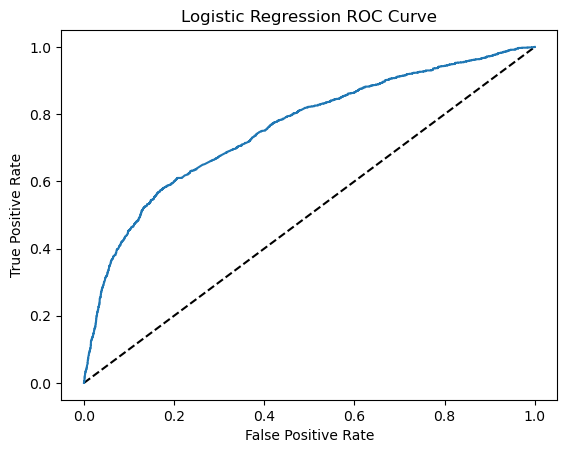

In [541]:
#plot the ROC curve
y_pred_prob = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()
